<a href="https://colab.research.google.com/github/phionex2/Deep-Learning/blob/main/Early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import warnings
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [64]:
X,y = make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

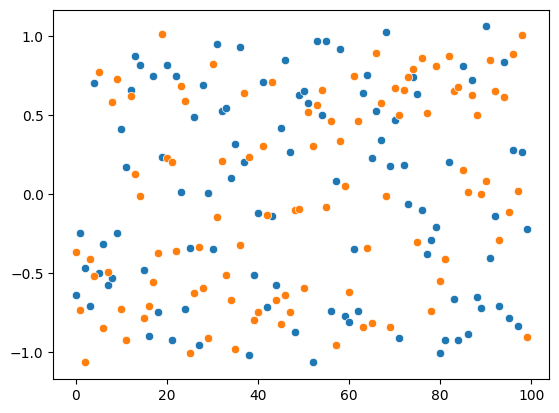

In [65]:
sns.scatterplot(X[:, 0])
sns.scatterplot(X[:, 1])

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [67]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [68]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [69]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,verbose=0)

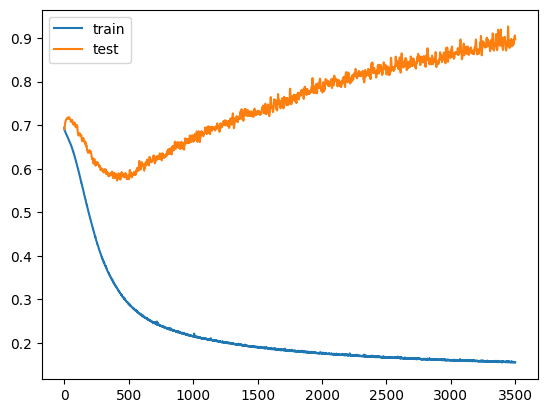

In [70]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

**EARLY STOPPING #CALLBACK** **FEATURE**

In [71]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [72]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
callback = EarlyStopping(
    monitor = "val_loss",#quantity
    min_delta = 0.00001,#min improvement
    patience=20,#no. of data with no improvements
    verbose=1,
    mode="auto",#depend upon quantity
    baseline=None,
    restore_best_weights=False
)

In [75]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 94ms/step - loss: 0.6752 - accuracy: 0.5625 - val_loss: 0.7184 - val_accuracy: 0.3500
Epoch 2/3500
3/3 [==============================] - 0s 41ms/step - loss: 0.6747 - accuracy: 0.5750 - val_loss: 0.7184 - val_accuracy: 0.3500
Epoch 3/3500
3/3 [==============================] - 0s 38ms/step - loss: 0.6741 - accuracy: 0.5750 - val_loss: 0.7191 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 36ms/step - loss: 0.6736 - accuracy: 0.5625 - val_loss: 0.7198 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 39ms/step - loss: 0.6728 - accuracy: 0.5625 - val_loss: 0.7199 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 44ms/step - loss: 0.6721 - accuracy: 0.5750 - val_loss: 0.7208 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 49ms/step - loss: 0.6714 - accuracy: 0.5750 - val_loss: 0.7214 - val_accuracy: 0.4000
Epoch 8/3500


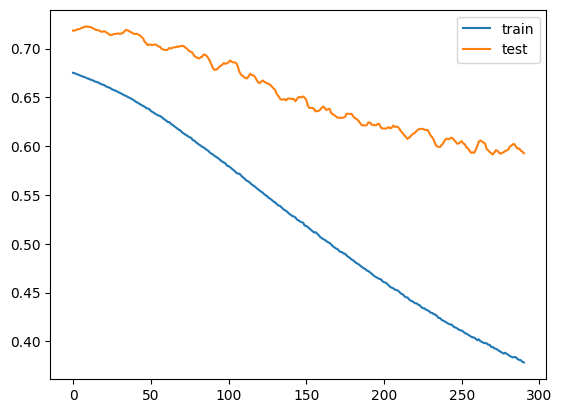

In [76]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()
